# Mounting the drive to the Colab

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
HARDataSet = '/content/gdrive/My Drive/Journal Paper/Human Activity Detection/UCI HAR Dataset/'

In [0]:
import numpy as np
import pandas as pd
import os
import glob

In [0]:
# get the features from the file features.txt
features = list()
PathFeature = os.path.join(HARDataSet, 'features.txt')
with open(PathFeature) as f:
    features = ['-'.join(line.split()) for line in f.readlines()]
print('No of Features: {}'.format(len(features)))
print(features)

No of Features: 561
['1-tBodyAcc-mean()-X', '2-tBodyAcc-mean()-Y', '3-tBodyAcc-mean()-Z', '4-tBodyAcc-std()-X', '5-tBodyAcc-std()-Y', '6-tBodyAcc-std()-Z', '7-tBodyAcc-mad()-X', '8-tBodyAcc-mad()-Y', '9-tBodyAcc-mad()-Z', '10-tBodyAcc-max()-X', '11-tBodyAcc-max()-Y', '12-tBodyAcc-max()-Z', '13-tBodyAcc-min()-X', '14-tBodyAcc-min()-Y', '15-tBodyAcc-min()-Z', '16-tBodyAcc-sma()', '17-tBodyAcc-energy()-X', '18-tBodyAcc-energy()-Y', '19-tBodyAcc-energy()-Z', '20-tBodyAcc-iqr()-X', '21-tBodyAcc-iqr()-Y', '22-tBodyAcc-iqr()-Z', '23-tBodyAcc-entropy()-X', '24-tBodyAcc-entropy()-Y', '25-tBodyAcc-entropy()-Z', '26-tBodyAcc-arCoeff()-X,1', '27-tBodyAcc-arCoeff()-X,2', '28-tBodyAcc-arCoeff()-X,3', '29-tBodyAcc-arCoeff()-X,4', '30-tBodyAcc-arCoeff()-Y,1', '31-tBodyAcc-arCoeff()-Y,2', '32-tBodyAcc-arCoeff()-Y,3', '33-tBodyAcc-arCoeff()-Y,4', '34-tBodyAcc-arCoeff()-Z,1', '35-tBodyAcc-arCoeff()-Z,2', '36-tBodyAcc-arCoeff()-Z,3', '37-tBodyAcc-arCoeff()-Z,4', '38-tBodyAcc-correlation()-X,Y', '39-tBodyA

In [0]:
print(len(set(features)))

561


In [0]:
## Checking for duplicates in List

def Repeat(x): 
    _size = len(x) 
    repeated = [] 
    for i in range(_size): 
        k = i + 1
        for j in range(k, _size): 
            if x[i] == x[j] and x[i] not in repeated: 
                repeated.append(x[i]) 
    return repeated

In [0]:
Repeat(features)

[]

In [0]:
X_train_path = os.path.join(HARDataSet, 'train/X_train.txt')

print(X_train_path)

/content/gdrive/My Drive/Journal Paper/Human Activity Detection/UCI HAR Dataset/train/X_train.txt


## Obtain the  train data 

In [0]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv(X_train_path, delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv(os.path.join(HARDataSet,'train/subject_train.txt'), header=None, squeeze=True)

In [0]:
y_train = pd.read_csv(os.path.join(HARDataSet,'train/y_train.txt'), names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,1-tBodyAcc-mean()-X,2-tBodyAcc-mean()-Y,3-tBodyAcc-mean()-Z,4-tBodyAcc-std()-X,5-tBodyAcc-std()-Y,6-tBodyAcc-std()-Z,7-tBodyAcc-mad()-X,8-tBodyAcc-mad()-Y,9-tBodyAcc-mad()-Z,10-tBodyAcc-max()-X,11-tBodyAcc-max()-Y,12-tBodyAcc-max()-Z,13-tBodyAcc-min()-X,14-tBodyAcc-min()-Y,15-tBodyAcc-min()-Z,16-tBodyAcc-sma(),17-tBodyAcc-energy()-X,18-tBodyAcc-energy()-Y,19-tBodyAcc-energy()-Z,20-tBodyAcc-iqr()-X,21-tBodyAcc-iqr()-Y,22-tBodyAcc-iqr()-Z,23-tBodyAcc-entropy()-X,24-tBodyAcc-entropy()-Y,25-tBodyAcc-entropy()-Z,"26-tBodyAcc-arCoeff()-X,1","27-tBodyAcc-arCoeff()-X,2","28-tBodyAcc-arCoeff()-X,3","29-tBodyAcc-arCoeff()-X,4","30-tBodyAcc-arCoeff()-Y,1","31-tBodyAcc-arCoeff()-Y,2","32-tBodyAcc-arCoeff()-Y,3","33-tBodyAcc-arCoeff()-Y,4","34-tBodyAcc-arCoeff()-Z,1","35-tBodyAcc-arCoeff()-Z,2","36-tBodyAcc-arCoeff()-Z,3","37-tBodyAcc-arCoeff()-Z,4","38-tBodyAcc-correlation()-X,Y","39-tBodyAcc-correlation()-X,Z","40-tBodyAcc-correlation()-Y,Z",...,525-fBodyBodyAccJerkMag-maxInds,526-fBodyBodyAccJerkMag-meanFreq(),527-fBodyBodyAccJerkMag-skewness(),528-fBodyBodyAccJerkMag-kurtosis(),529-fBodyBodyGyroMag-mean(),530-fBodyBodyGyroMag-std(),531-fBodyBodyGyroMag-mad(),532-fBodyBodyGyroMag-max(),533-fBodyBodyGyroMag-min(),534-fBodyBodyGyroMag-sma(),535-fBodyBodyGyroMag-energy(),536-fBodyBodyGyroMag-iqr(),537-fBodyBodyGyroMag-entropy(),538-fBodyBodyGyroMag-maxInds,539-fBodyBodyGyroMag-meanFreq(),540-fBodyBodyGyroMag-skewness(),541-fBodyBodyGyroMag-kurtosis(),542-fBodyBodyGyroJerkMag-mean(),543-fBodyBodyGyroJerkMag-std(),544-fBodyBodyGyroJerkMag-mad(),545-fBodyBodyGyroJerkMag-max(),546-fBodyBodyGyroJerkMag-min(),547-fBodyBodyGyroJerkMag-sma(),548-fBodyBodyGyroJerkMag-energy(),549-fBodyBodyGyroJerkMag-iqr(),550-fBodyBodyGyroJerkMag-entropy(),551-fBodyBodyGyroJerkMag-maxInds,552-fBodyBodyGyroJerkMag-meanFreq(),553-fBodyBodyGyroJerkMag-skewness(),554-fBodyBodyGyroJerkMag-kurtosis(),"555-angle(tBodyAccMean,gravity)","556-angle(tBodyAccJerkMean),gravityMean)","557-angle(tBodyGyroMean,gravityMean)","558-angle(tBodyGyroJerkMean,gravityMean)","559-angle(X,gravityMean)","560-angle(Y,gravityMean)","561-angle(Z,gravityMean)",subject,Activity,ActivityName
624,0.200352,-0.034791,-0.181266,-0.365372,-0.025415,-0.380246,-0.415289,-0.088163,-0.398924,0.0287,-0.115891,-0.510367,0.310325,-0.235225,0.366292,-0.24246,-0.796086,-0.815605,-0.816583,-0.486851,-0.287064,-0.454367,0.132935,0.309584,-0.045625,-0.251937,0.107631,0.242231,-0.190739,0.07105,-0.028776,0.391672,-0.371121,-0.26898,0.256014,0.119226,-0.435876,-0.211247,-0.332222,0.484151,...,-0.904762,0.094073,0.051714,-0.291572,-0.480227,-0.551765,-0.497937,-0.598925,-0.79251,-0.480227,-0.857111,-0.47296,0.570817,-0.948718,0.031385,-0.422344,-0.718807,-0.545198,-0.488073,-0.511216,-0.472585,-0.795318,-0.545198,-0.875896,-0.635413,0.385268,-0.904762,-0.157252,0.127495,-0.238122,0.218915,-0.1856,-0.950587,0.222445,-0.732917,0.252147,0.122343,3,1,WALKING


In [0]:
train.shape

(7352, 564)

## Obtain the  test data 

In [0]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv(os.path.join(HARDataSet,'test/X_test.txt'), delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv(os.path.join(HARDataSet,'test/subject_test.txt'), header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv(os.path.join(HARDataSet,'test/y_test.txt'), names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,1-tBodyAcc-mean()-X,2-tBodyAcc-mean()-Y,3-tBodyAcc-mean()-Z,4-tBodyAcc-std()-X,5-tBodyAcc-std()-Y,6-tBodyAcc-std()-Z,7-tBodyAcc-mad()-X,8-tBodyAcc-mad()-Y,9-tBodyAcc-mad()-Z,10-tBodyAcc-max()-X,11-tBodyAcc-max()-Y,12-tBodyAcc-max()-Z,13-tBodyAcc-min()-X,14-tBodyAcc-min()-Y,15-tBodyAcc-min()-Z,16-tBodyAcc-sma(),17-tBodyAcc-energy()-X,18-tBodyAcc-energy()-Y,19-tBodyAcc-energy()-Z,20-tBodyAcc-iqr()-X,21-tBodyAcc-iqr()-Y,22-tBodyAcc-iqr()-Z,23-tBodyAcc-entropy()-X,24-tBodyAcc-entropy()-Y,25-tBodyAcc-entropy()-Z,"26-tBodyAcc-arCoeff()-X,1","27-tBodyAcc-arCoeff()-X,2","28-tBodyAcc-arCoeff()-X,3","29-tBodyAcc-arCoeff()-X,4","30-tBodyAcc-arCoeff()-Y,1","31-tBodyAcc-arCoeff()-Y,2","32-tBodyAcc-arCoeff()-Y,3","33-tBodyAcc-arCoeff()-Y,4","34-tBodyAcc-arCoeff()-Z,1","35-tBodyAcc-arCoeff()-Z,2","36-tBodyAcc-arCoeff()-Z,3","37-tBodyAcc-arCoeff()-Z,4","38-tBodyAcc-correlation()-X,Y","39-tBodyAcc-correlation()-X,Z","40-tBodyAcc-correlation()-Y,Z",...,525-fBodyBodyAccJerkMag-maxInds,526-fBodyBodyAccJerkMag-meanFreq(),527-fBodyBodyAccJerkMag-skewness(),528-fBodyBodyAccJerkMag-kurtosis(),529-fBodyBodyGyroMag-mean(),530-fBodyBodyGyroMag-std(),531-fBodyBodyGyroMag-mad(),532-fBodyBodyGyroMag-max(),533-fBodyBodyGyroMag-min(),534-fBodyBodyGyroMag-sma(),535-fBodyBodyGyroMag-energy(),536-fBodyBodyGyroMag-iqr(),537-fBodyBodyGyroMag-entropy(),538-fBodyBodyGyroMag-maxInds,539-fBodyBodyGyroMag-meanFreq(),540-fBodyBodyGyroMag-skewness(),541-fBodyBodyGyroMag-kurtosis(),542-fBodyBodyGyroJerkMag-mean(),543-fBodyBodyGyroJerkMag-std(),544-fBodyBodyGyroJerkMag-mad(),545-fBodyBodyGyroJerkMag-max(),546-fBodyBodyGyroJerkMag-min(),547-fBodyBodyGyroJerkMag-sma(),548-fBodyBodyGyroJerkMag-energy(),549-fBodyBodyGyroJerkMag-iqr(),550-fBodyBodyGyroJerkMag-entropy(),551-fBodyBodyGyroJerkMag-maxInds,552-fBodyBodyGyroJerkMag-meanFreq(),553-fBodyBodyGyroJerkMag-skewness(),554-fBodyBodyGyroJerkMag-kurtosis(),"555-angle(tBodyAccMean,gravity)","556-angle(tBodyAccJerkMean),gravityMean)","557-angle(tBodyGyroMean,gravityMean)","558-angle(tBodyGyroJerkMean,gravityMean)","559-angle(X,gravityMean)","560-angle(Y,gravityMean)","561-angle(Z,gravityMean)",subject,Activity,ActivityName
964,0.274384,-0.016579,-0.107141,-0.992763,-0.995205,-0.994271,-0.993249,-0.99507,-0.99424,-0.9392,-0.575589,-0.819235,0.84337,0.69273,0.847283,-0.995554,-0.999941,-0.999977,-0.999908,-0.993924,-0.99549,-0.99419,-0.606152,-0.739112,-0.596334,-0.065956,0.096504,-0.109172,0.165494,0.435476,-0.225187,0.181207,0.427423,0.352327,-0.091284,0.064577,-0.027601,-0.357762,-0.181949,-0.200893,...,-0.936508,0.499161,-0.60391,-0.872146,-0.991639,-0.995683,-0.994612,-0.996523,-0.992581,-0.991639,-0.999952,-0.993583,-0.924075,-0.897436,0.803153,-0.803928,-0.950083,-0.989326,-0.991716,-0.989928,-0.992658,-0.997059,-0.989326,-0.999922,-0.989572,-0.923452,-0.936508,0.410676,-0.554316,-0.825585,-0.296759,0.196874,-0.941872,0.394126,0.56003,-0.796216,-0.197917,10,6,LAYING


# Data Cleaning

## 1. Check for Duplicates

In [0]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [0]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


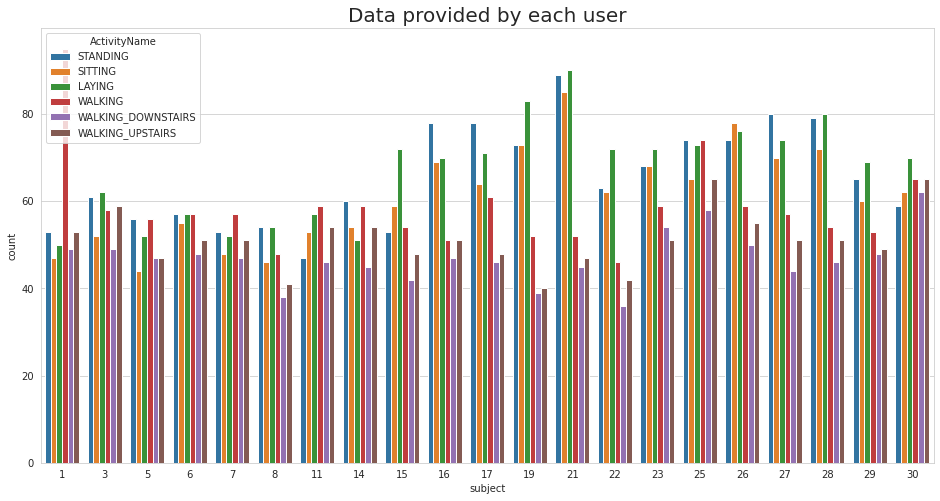

In [0]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

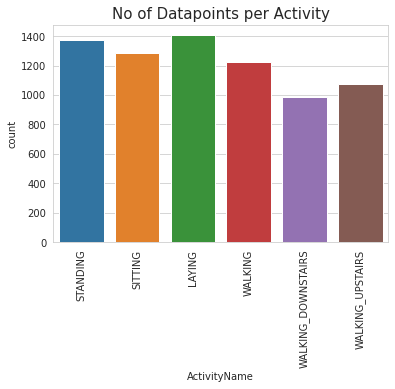

In [0]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

## 4. Changing feature names 

In [0]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['1tBodyAccmeanX', '2tBodyAccmeanY', '3tBodyAccmeanZ', '4tBodyAccstdX',
       '5tBodyAccstdY', '6tBodyAccstdZ', '7tBodyAccmadX', '8tBodyAccmadY',
       '9tBodyAccmadZ', '10tBodyAccmaxX',
       ...
       '555angletBodyAccMeangravity', '556angletBodyAccJerkMeangravityMean',
       '557angletBodyGyroMeangravityMean',
       '558angletBodyGyroJerkMeangravityMean', '559angleXgravityMean',
       '560angleYgravityMean', '561angleZgravityMean', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [0]:
#/content/gdrive/My Drive/Journal Paper/Human Activity Detection/UCI HAR Dataset/csv_files

train.to_csv('/content/gdrive/My Drive/Journal Paper/Human Activity Detection/UCI HAR Dataset/csv_files/train.csv', index=False)
test.to_csv('/content/gdrive/My Drive/Journal Paper/Human Activity Detection/UCI HAR Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

### 2. Stationary and Moving activities are completely different

In [0]:
print(train.columns[201])

202tBodyAccMagstd


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


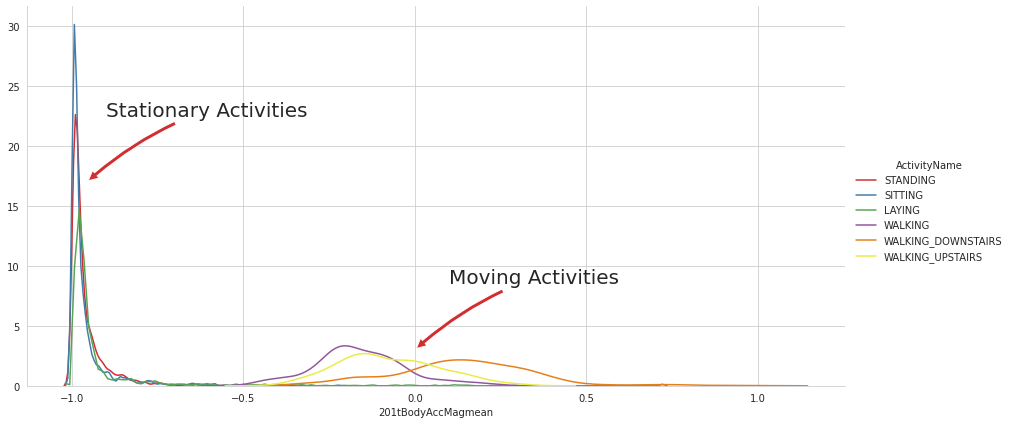

In [0]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'201tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.1, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


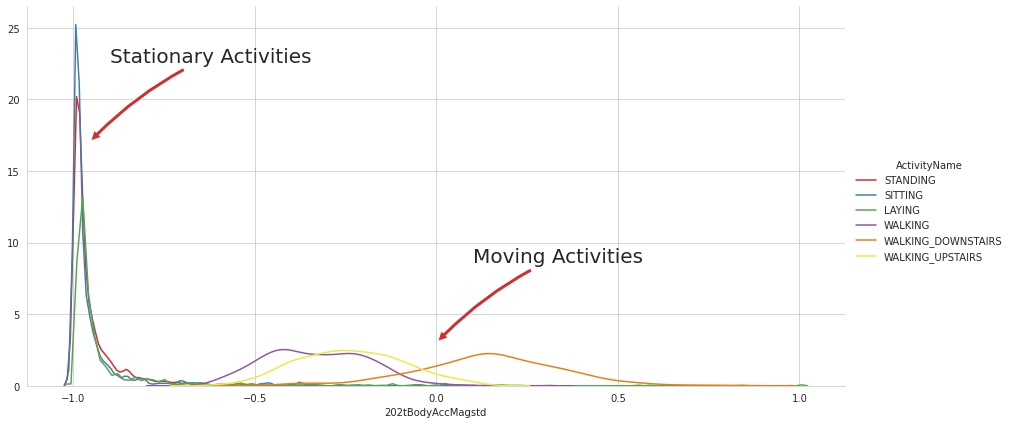

In [0]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', size=6,aspect=2)
facetgrid.map(sns.distplot,'202tBodyAccMagstd', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.1, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()